In [18]:
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, precision_score
from sklearn.neural_network import MLPClassifier


ModuleNotFoundError: No module named 'imblearn'

In [20]:
import imblearn
print('Imblearn: {}', format(imblearn.__version__))

Imblearn: {} 0.7.0


In [2]:
print('Python: {}'.format(sys.version))
print('Pandas {}'.format(pd.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Seaborn {}'.format(sns.__version__))

Python: 3.8.0 (v3.8.0:fa919fdf25, Oct 14 2019, 10:23:27) 
[Clang 6.0 (clang-600.0.57)]
Pandas 1.0.3
Sklearn: 0.23.1
Seaborn 0.10.1


In [3]:
data = pd.read_csv("creditcard.csv")


In [4]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
print(data.shape)

(284807, 31)


In [14]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [8]:
Fraud = data[data["Class"]== 1]
Valid = data[data["Class"]== 0]

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

Fraud Cases: 492
Valid Cases: 284315


In [9]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

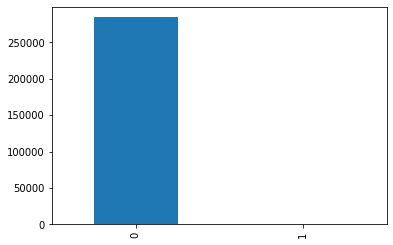

In [16]:
data['Class'].value_counts().plot.bar()

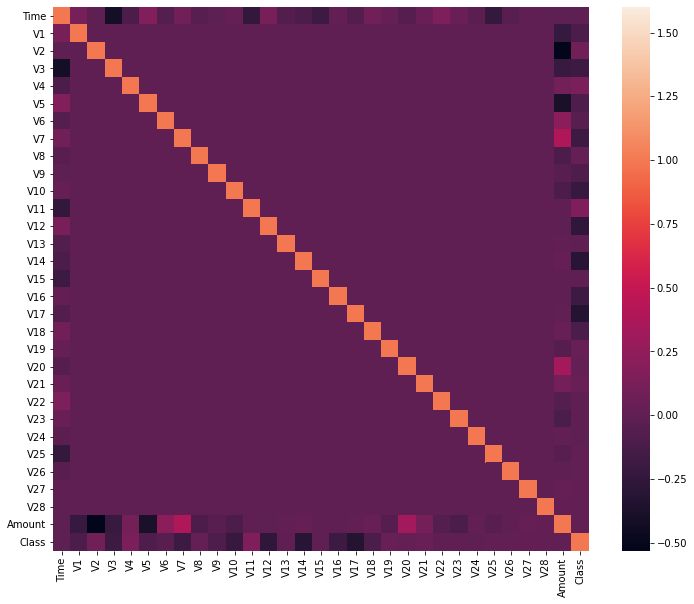

In [13]:
#determining correlation between variables and plotting a correlation matrix
corremat = data.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(corremat, vmax = 1.6)
plt.show()

In [25]:
#feature scaling using Standard Scalar
data['Normalized Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis=1)
data = data.drop(['Time'], axis=1)
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized Amount
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0,0.514355


In [26]:
#Seperating the target class from the dataframe
X = data.iloc[:, data.columns != 'Class']
Y = data.iloc[:, data.columns == 'Class']

print(X.columns)
print(Y.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Normalized Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [48]:
#splitting data into training and testing
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0, shuffle=True, stratify=Y)

In [31]:
#Applying KNN algorithm 
model = KNeighborsClassifier(n_neighbors = 5, weights='distance')
model.fit(X_train, Y_train.values.ravel())
prediction = model.predict(X_test)
recall = recall_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(Y_test, prediction)

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [32]:
cm = confusion_matrix(Y_test, prediction)
print(cm)
print('Recall Score: {}'.format(recall))
print('Precision score {}'.format(precision))
print(classification_report(Y_test, prediction))


[[85289     7]
 [   39   108]]
Recall Score: 0.7346938775510204
Precision score 0.9391304347826087
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.73      0.82       147

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [78]:
#Applying Decision tree algorithm
classifier = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, 
                                    min_samples_leaf=1, min_samples_split=2)

classifier.fit(X_train,Y_train)
prediction = classifier.predict(X_test)
recall = recall_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)


In [79]:
cm = confusion_matrix(Y_test, prediction)
print(cm)
print('Recall Score: {}'.format(recall))
print('Precision score {}'.format(precision))
print(classification_report(Y_test, prediction))

[[56839    22]
 [   26    75]]
Recall Score: 0.7425742574257426
Precision score 0.7731958762886598
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.77      0.74      0.76       101

    accuracy                           1.00     56962
   macro avg       0.89      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [114]:
#Applying Random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, Y_train.values.ravel())
prediction = classifier.predict(X_test)
recall = recall_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)



0.9586776859504132
0.9996488887328394


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.79')

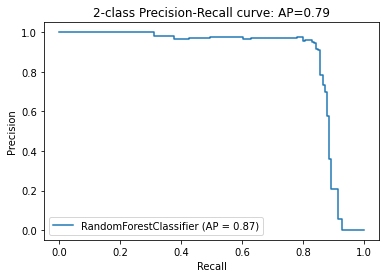

In [116]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
accuracy = accuracy_score(Y_test, prediction)
print(precision)
print(accuracy)

disp = plot_precision_recall_curve(classifier, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [119]:
print('Confusion Matrix on training set')
print(pd.crosstab(Y_test.values.ravel(), prediction, rownames=['True'], colnames=['Predicted'], margins=True))

Confusion Matrix on training set
Predicted      0    1    All
True                        
0          85297    5  85302
1             25  116    141
All        85322  121  85443


In [120]:
25/141

0.1773049645390071

In [23]:
cm = confusion_matrix(Y_test, prediction)
print(cm)
print('Recall Score: {}'.format(recall))
print('Precision score {}'.format(precision))
print(classification_report(Y_test, prediction))

[[85289     7]
 [   34   113]]
Recall Score: 0.7687074829931972
Precision score 0.9416666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.77      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [4]:
#Applying neural network using tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
#Initializing the ANN
ann_classifier = Sequential()

#Adding the input layer and first hidden layer
ann_classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu', input_dim=29))

# Adding the second hidden layer
ann_classifier.add(Dense(units=15, kernel_initializer = 'uniform', activation = 'relu'))

#Adding the output layer
ann_classifier.add(Dense(units=1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
ann_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [tf.keras.metrics.Precision()])

# Fitting the ANN to the Training set
history = ann_classifier.fit(X_train, Y_train, batch_size = 10, epochs = 50, verbose = 1, validation_data=(X_test, Y_test))

Train on 199364 samples, validate on 85443 samples
Epoch 1/50
199364/199364 [==============================] - 38s 191us/step - loss: 0.0072 - precision_2: 0.5651 - val_loss: 0.0034 - val_precision_2: 0.8384
Epoch 2/50
199364/199364 [==============================] - 38s 192us/step - loss: 0.0032 - precision_2: 0.8378 - val_loss: 0.0034 - val_precision_2: 0.8397
Epoch 3/50
199364/199364 [==============================] - 37s 185us/step - loss: 0.0030 - precision_2: 0.8402 - val_loss: 0.0037 - val_precision_2: 0.8405
Epoch 4/50
199364/199364 [==============================] - 38s 192us/step - loss: 0.0029 - precision_2: 0.8417 - val_loss: 0.0033 - val_precision_2: 0.8421
Epoch 5/50
199364/199364 [==============================] - 38s 190us/step - loss: 0.0029 - precision_2: 0.8444 - val_loss: 0.0033 - val_precision_2: 0.8430
Epoch 6/50
199364/199364 [==============================] - 38s 188us/step - loss: 0.0027 - precision_2: 0.8432 - val_loss: 0.0034 - val_precision_2: 0.8462
Epoch 7

In [17]:
print(history.history.keys())

dict_keys(['val_loss', 'val_precision_2', 'loss', 'precision_2'])


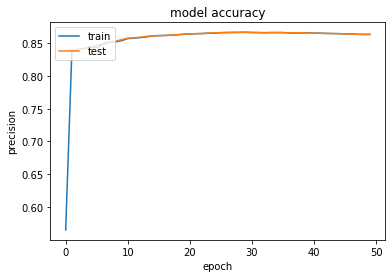

In [18]:

plt.plot(history.history['precision_2'])
plt.plot(history.history['val_precision_2'])
plt.title('model accuracy')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

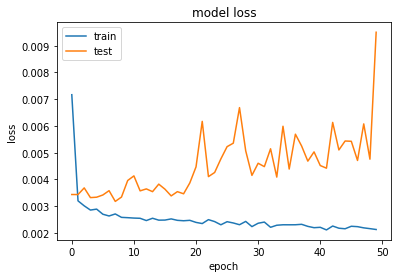

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
prediction = ann_classifier.predict(X_test)
prediction = (prediction>0.5)
score = ann_classifier.evaluate(X_test, Y_test)
score

85443/85443 [==============================] - 2s 18us/step


[0.0038162737201217164, 0.9994382262229919]

In [35]:
precision = precision_score(Y_test, prediction)
print('Precision score {}'.format(precision))
print(confusion_matrix(Y_test, prediction))
print(classification_report(Y_test, prediction))


Precision score 0.8666666666666667
[[85278    18]
 [   30   117]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.80      0.83       147

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



## Using SMOTE to balance the dataset

In [55]:
from imblearn.over_sampling import SMOTE
import pandas as pd
sm = SMOTE(random_state=42)


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

In [106]:
X_train_new, Y_train_new = sm.fit_sample(X_train,Y_train)

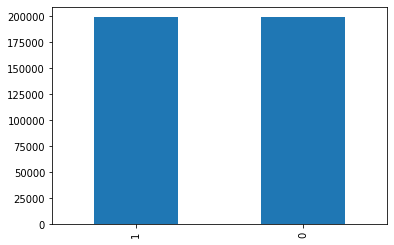

In [104]:
Y_train_new['Class'].value_counts().plot.bar()

### Now we can observe the dataset is balanced and the positive and negative class are more or less equal

In [121]:
#Applying Random forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
rf_classifier.fit(X_train_new, Y_train_new.values.ravel())
train_pred = rf_classifier.predict(X_train_new)
test_pred = rf_classifier.predict(X_test)



In [124]:
from sklearn.metrics import accuracy_score, precision_score
train_acc = accuracy_score(train_pred, Y_train_new)
test_acc = accuracy_score(test_pred, Y_test)
train_pre = precision_score(train_pred, Y_train_new)
test_pre = precision_score(test_pred, Y_test)

print(train_pre)
print(test_pre)

1.0
0.851063829787234


In [130]:
print('Confusio Matrix')
print(pd.crosstab(Y_test.values.ravel(), test_pred, rownames=['True'], colnames=['Predicted'], margins=True))

Confusio Matrix
Predicted      0    1    All
True                        
0          85281   21  85302
1             21  120    141
All        85302  141  85443


In [132]:
21/141

0.14893617021276595

## Conclusion

Error in prediction can be made in two ways:
1. Classifying fraud as non-fraud
2. Classifying non-fraud as fraud

The first error is more costlier than th first one in this case.
This depends solely on the classification problem statement therefore we have to choose the evaluation metric accordingly.
